In [34]:
# Pytorch版
import torch
from torch import nn
import matplotlib.pyplot as plt

In [35]:
class OTLayer(nn.Module):
    def __init__(self, epsilon):
        super().__init__()
        self.epsilon = epsilon
    
    def forward(self, C, a, b, L):
        K = torch.exp( - C / self.epsilon)
        u = torch.ones_like(a)
        v = torch.ones_like(b)
        for l in range(L):
            v = b / torch.mv(torch.t(K), u)
            u = a / torch.mv(K, v)
        f = self.epsilon * torch.log(u)
        g = self.epsilon * torch.log(v)
        return f, g, torch.diag(u) @ K @ torch.diag(v)

In [31]:
C = torch.tensor([
    [30., 80., 40., 90.],
    [20., 50., 90., 80.],
    [80., 70., 30., 40.],
    [70., 50., 10., 60.]
    ], requires_grad=True)

a = torch.ones(4) / 4.
b = torch.ones(4) / 4.

In [32]:
otl = OTLayer(1.0)
f, g, P = otl(C, a, b, 10)
print(f, g, P)

tensor([12.1295, -0.1043,  0.0000, -2.2801], grad_fn=<MulBackward0>) tensor([16.4842, 48.6047, 10.7869, 38.6137], grad_fn=<MulBackward0>) tensor([[2.5000e-01, 4.2952e-09, 3.8080e-08, 8.9331e-18],
        [2.6780e-02, 2.2322e-01, 3.5718e-35, 9.5690e-19],
        [2.6027e-28, 5.1067e-10, 4.5274e-09, 2.5000e-01],
        [5.8635e-25, 2.5340e-02, 2.2466e-01, 5.2703e-11]],
       grad_fn=<MmBackward0>)


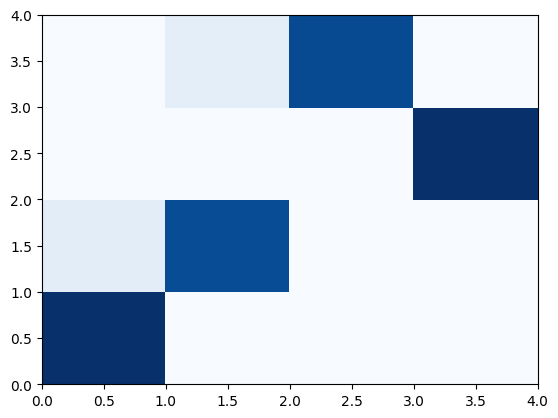

In [33]:
plt.pcolor(P.detach().numpy().copy(), cmap=plt.cm.Blues)